<a href="https://colab.research.google.com/github/Rishit605/Deep-Learning/blob/main/Tensor_Keras_Training_Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## This method is used for connecting Google Drive to this Noebook and Access the Drive data.
## This is a Code Snippet I had found on a python file from the internet.

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
cd "/content/drive/MyDrive/Precision Agriculture/Task1 Team-4" ## 'cd' stands for Change Directory and can be used for changing directory, Use this function and change the file path, put the file path after cd.

/content/drive/MyDrive/Precision Agriculture/Task1 Team-4


In [ ]:
pwd # This is used for printing out what is the current directory we are in.

'/content/drive/MyDrive/Precision Agriculture/Task1 Team-4'

In [ ]:
## This function is Google Colab specific and is used to unzip a zip or rar file and '-d' defines the destination directory to which you need to extract the files to.

# ! unzip '/content/drive/MyDrive/Precision Agriculture/Task1/dataset.zip' -d '/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/dataset'

In [ ]:
## Importing Libraries

import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

from PIL import Image
import os
import matplotlib.pyplot as plt

In [ ]:
## Defining the path to the images.

dat = "/content/drive/MyDrive/Precision Agriculture/Task1 Team-4/dataset/dataset/PlantVillage"

In [ ]:
# Function used for Checking the Total No. of files

def file_list(dir):
  files_list = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
  total_files = len(files_list)
  return total_files

In [ ]:
file_list('/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/dataset/filtered_data/Applq')

75

In [ ]:
pwd

'/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data'

In [ ]:
## Filtering the RGBA formate images
## This comes under data manipulation>data Filtering 
## This function is used to filter and save RGB images to a different directory and custom function that I created. And can be used for a new dataset.

filt = []

def a_filt(src_path, img_size, tar_path):
    for f in os.listdir(src_path):
        if f.endswith(".png") or f.endswith(".PNG") or f.endswith(".jpg") or f.endswith(".jpeg"):
            im = Image.open(os.path.join(src_path, f))
            if im.mode == "RGBA":
                print(f"{f} has an alpha channel.")
                filt.append(f)
            with Image.open(f'{src_path}/{f}') as img:
                img_con = img.convert("RGB")
                img_a = img_con.resize((img_size))
                img_a.save(f'{tar_path}/{f}')
            if im.mode == "RGB":
                print("0")
                img = img.resize((img_size))
                img.save(f'{tar_path}/{f}')
    print('\nTotal Number of Files: ' , len(filt))

In [ ]:
a_filt("/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/dataset/dataset/orange", (224, 224), '/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/dataset/filtered_data/Orange')

In [ ]:
"""
orange has 10 alpha
apple has 14 aplha 
banana has 21 aplha
"""

'\norange has 10 alpha\napple has 14 aplha \nbanana has 21 aplha\n'

In [ ]:
## PARAMETERS
## These varaibles define 

BATCH_SIZE=64
IMG_SIZE=(150, 150)

In [ ]:
filt_dat = '/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/dataset/filtered_data-150 (custom CNN)'

In [ ]:
## THis is an Import function that is provided by the Tensorflow/keras library.
## It automatically load and mainpulate images without the need to save the maipulated images on the disk,
## and automatically determines the classes, assuming that the images are speperated into different folder for classification.

datagen = IDG( # These argumensts are used for Image Manipulation. And are not neccessay AT THE MOMENT but are very useful.
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    filt_dat,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical' ## This function defines the type of classifciation two arguments can be given are 'categorical' - for multiclass classification (more than 2) and 'binary' - for binary classification or classifying two classes.
)

# for i in range(10):
# batch = train_gen.next()
# print(batch[1])

In [ ]:
## This is a convolutional Neural Network.
## You can learn about it from ChatGPT by asking "Explain the architecture of a CNN for Image Classification with code."

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), ## This is an input layer. 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='relu'), ## This is a Convolution Layers 2D defines height and width of an image, 1D is used in texts, 3D is used for 3D images and photogrammetry.
    layers.MaxPooling2D(pool_size=(2,2)), ## This is a Pooling layer, whihc essentially uses the pool_size argument to look at 4 pxiels for (2,2) and take their ax value and map it to lower dimenational image.
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'), ## This is a neuron fully_connected layer
    layers.Dense(3, activation='softmax'), ## This is the output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [ ]:
## Then we compile the model speperately as compatred to ML algorithms and specify our needs for the model to consider.

opt = keras.optimizers.Adam(learning_rate=1e-3) ## This is fuction for defining custom Learning Rate and not neccessary for now. 

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']) ## 'loss' is defined by the use for multiclass classification or binary classification

In [ ]:
history=model.fit(train_gen, epochs=25, steps_per_epoch=train_gen.samples//BATCH_SIZE, verbose=1) ## Training the mode take splace here.

Epoch 1/25
3/3 [==============================] - 3s 353ms/step - loss: 0.6593 - accuracy: 0.7628
Epoch 2/25
3/3 [==============================] - 1s 441ms/step - loss: 0.5263 - accuracy: 0.8229
Epoch 3/25
3/3 [==============================] - 1s 432ms/step - loss: 0.4637 - accuracy: 0.8646
Epoch 4/25
3/3 [==============================] - 1s 320ms/step - loss: 0.3770 - accuracy: 0.9038
Epoch 5/25
3/3 [==============================] - 1s 480ms/step - loss: 0.2891 - accuracy: 0.8910
Epoch 6/25
3/3 [==============================] - 1s 582ms/step - loss: 0.3367 - accuracy: 0.9038
Epoch 7/25
3/3 [==============================] - 2s 428ms/step - loss: 0.2654 - accuracy: 0.9103
Epoch 8/25
3/3 [==============================] - 1s 437ms/step - loss: 0.2617 - accuracy: 0.9115
Epoch 9/25
3/3 [==============================] - 1s 327ms/step - loss: 0.1965 - accuracy: 0.9423
Epoch 10/25
3/3 [==============================] - 1s 319ms/step - loss: 0.2221 - accuracy: 0.9167
Epoch 11/25
3/3 [==

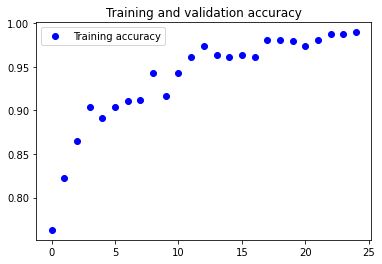

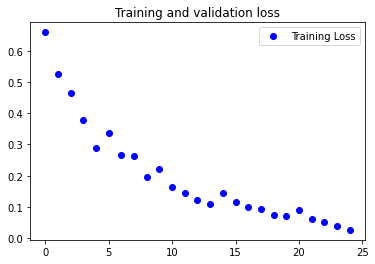

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
    loss = history.history['loss']
#     val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
#     plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
plot_loss_acc(history)

In [ ]:
pwd

'/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data'

In [ ]:
model.save('/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/model/CutomCNN.h5', save_format='h5') ## We can save our model using this method.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving autumn-day-rural-garden-frame-600w-1798373137.jpeg to autumn-day-rural-garden-frame-600w-1798373137.jpeg
User uploaded file "autumn-day-rural-garden-frame-600w-1798373137.jpeg" with length 68280 bytes


In [ ]:
## DUnction for predicting Custom images.

import numpy as np

def pred_img(img_path, img_size):
  
  # Load the image using PIL
  img = Image.open(img_path)

  # Resize the image to (150, 150)
  img = img.resize(img_size)

  # Convert the image to RGB format
  img = img.convert('RGB')

  # Convert the PIL image to a NumPy array
  img_array = np.array(img)

  # Reshape the array to a 4D tensor with shape (1, 150, 150, 3)
  img_tensor = img_array.reshape((1, 150, 150, 3))

  # Normalize the pixel values to be between 0 and 1
  img_tensor = img_tensor / 255.0

  # Now you can pass img_tensor to your image classification model for prediction
  x = model.predict(img_tensor)

  return x

In [ ]:
pred_img("/content/drive/MyDrive/Precision Agriculture/Task1 Prep Data/autumn-day-rural-garden-frame-600w-1798373137.jpeg", (150, 150))

1/1 [==============================] - 0s 180ms/step


array([[9.9997818e-01, 3.3891627e-06, 1.8427849e-05]], dtype=float32)